<a href="https://colab.research.google.com/github/12vikas12/Apex-Planet-Internship/blob/main/vtu23125_tak2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Descriptive Statistics:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000



Missing values:
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Unique Ages: [19 21 20 23 31 22 35 64 30 67 58 24 37 52 25 46 54 29 45 40 60 53 18 49
 42 36 65 48 50 27 33 59 47 51 69 70 63 43 68 32 26 57 38 55 34 66 39 44
 28 56 41]

Analyzing column: CustomerID

Analyzing column: Age

Analyzing column: Annual Income (k$)

Analyzing column: Spending Score (1-100)


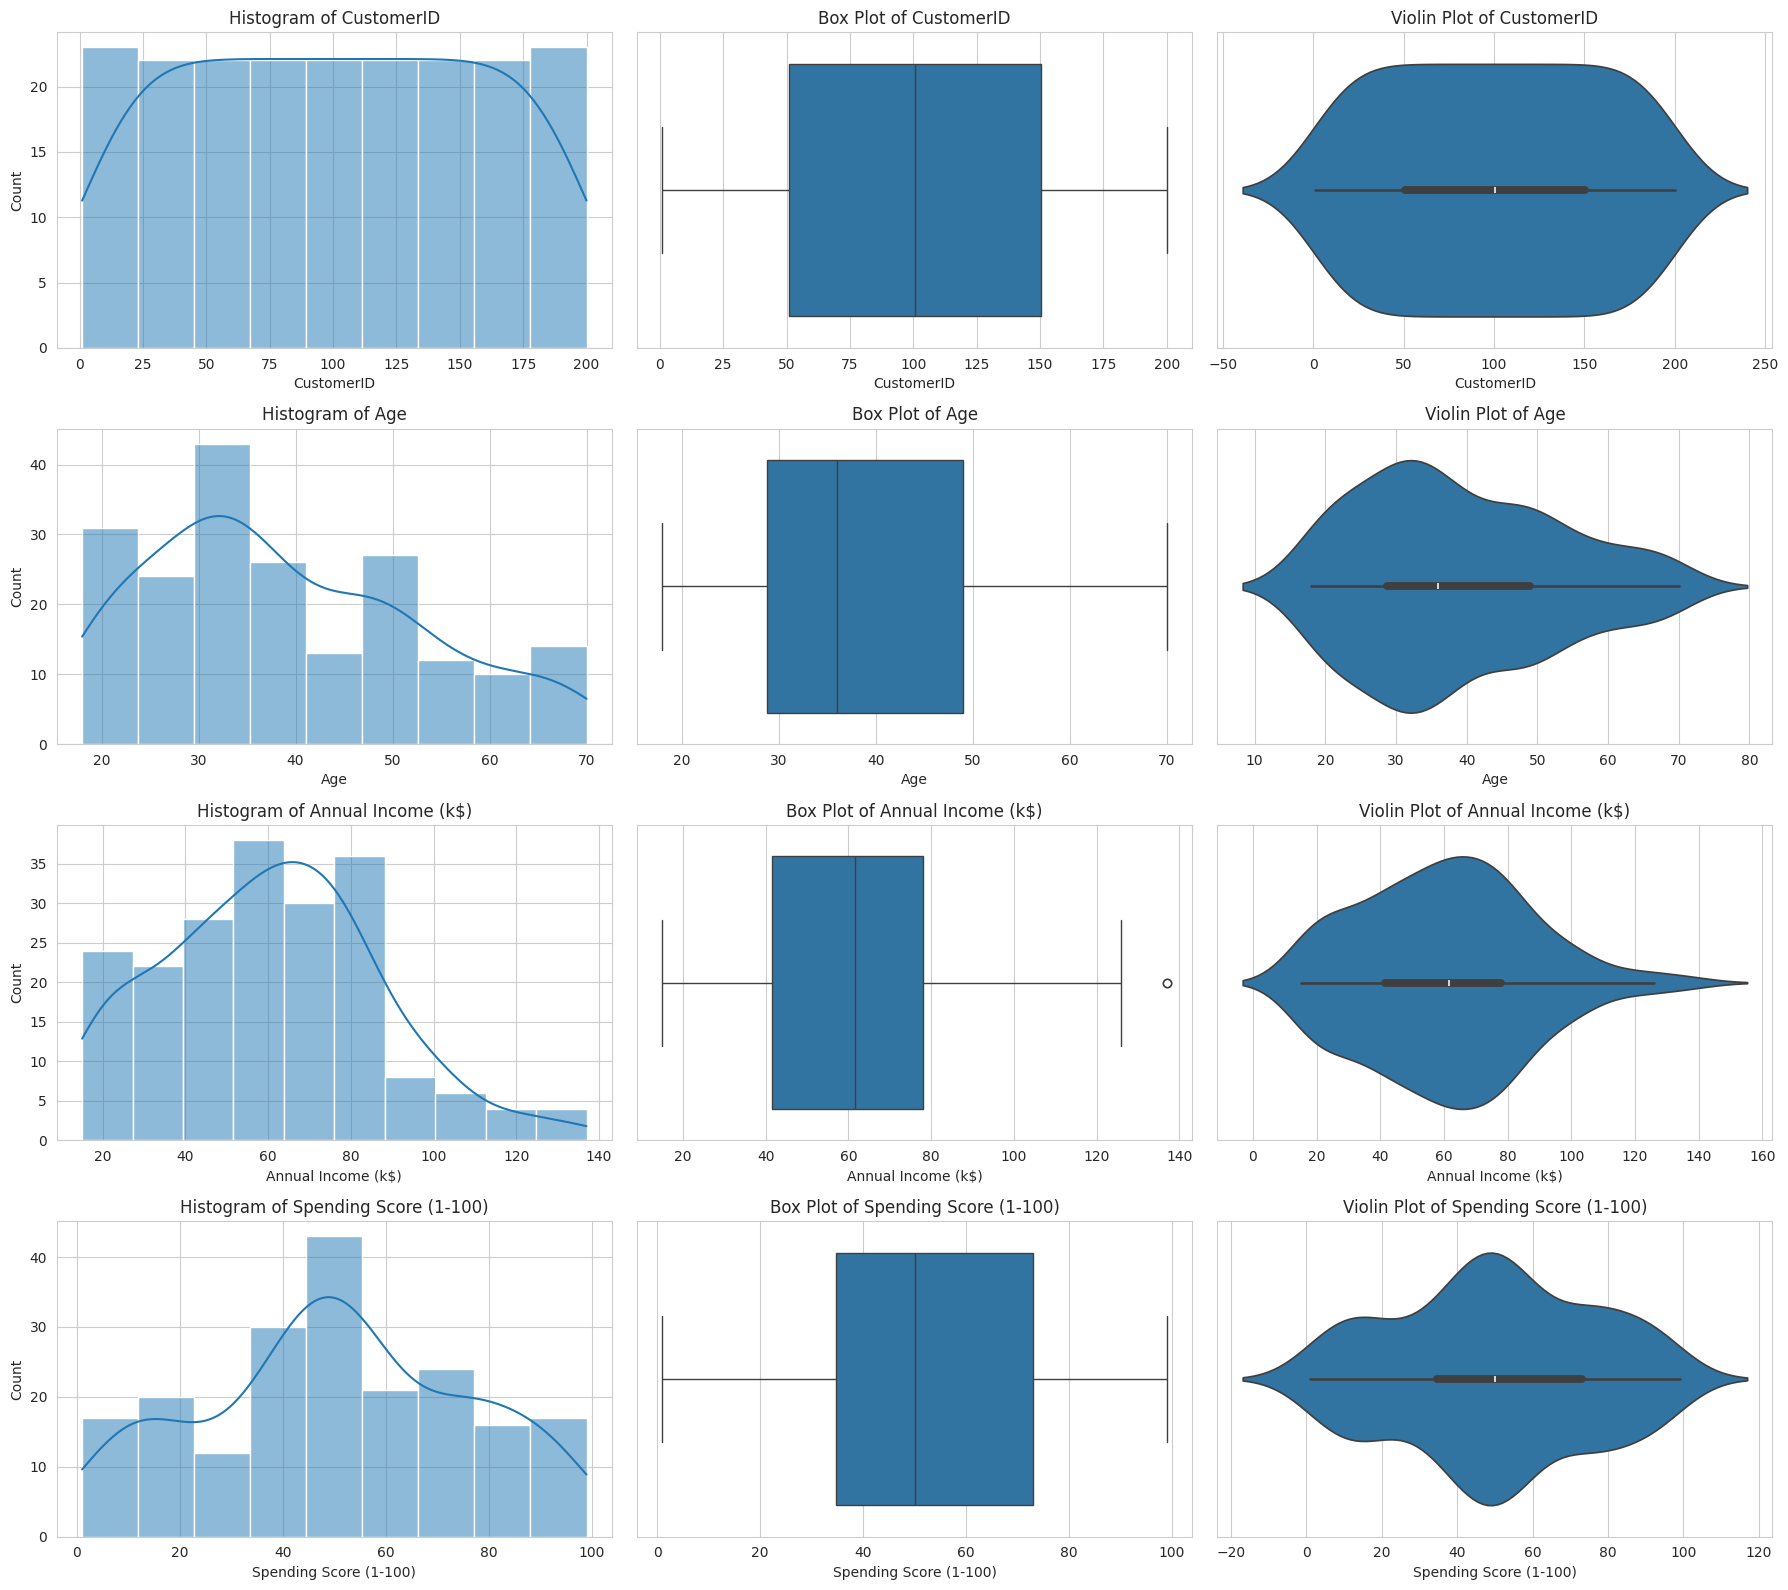


Categorical columns found. Generating count plots:
Analyzing column: Genre


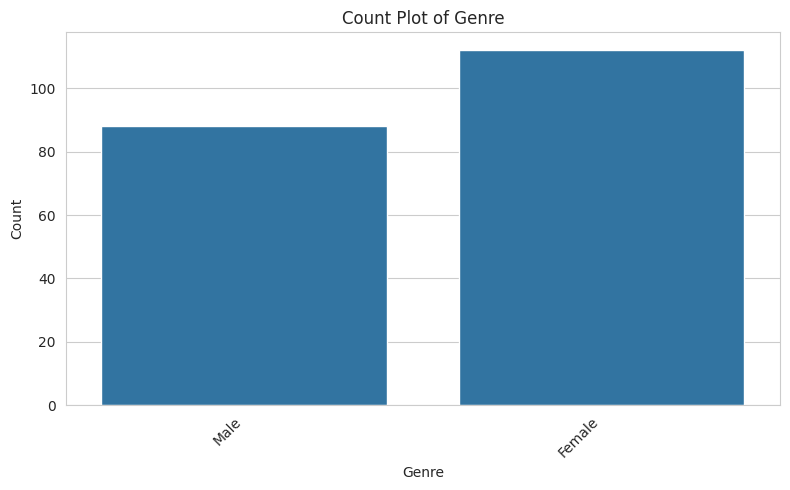


Number of outliers in 'Annual Income (k$)' using IQR method: 2

Data types after cleaning (no changes made):
CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_excel('/content/Shopping_data.csv.xlsx')
display(df.head())

# Basic info
print("\nDataset Info:")
print(df.info())

print("\nDescriptive Statistics:")
display(df.describe())

# Missing values
print("\nMissing values:")
print(df.isnull().sum())

# Unique values (example on Age column)
if 'Age' in df.columns:
    print("\nUnique Ages:", df['Age'].unique())

# =====================
# Continuous Variables Plots
# =====================
sns.set_style("whitegrid")
continuous_cols = df.select_dtypes(include=['float64', 'int64']).columns

n_cols = 3
n_rows = (len(continuous_cols) * 3 + n_cols - 1) // n_cols  # each col has 3 plots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

plot_index = 0
for col in continuous_cols:
    print(f"\nAnalyzing column: {col}")

    # Histogram
    sns.histplot(data=df, x=col, kde=True, ax=axes[plot_index])
    axes[plot_index].set_title(f'Histogram of {col}')
    plot_index += 1

    # Boxplot
    sns.boxplot(data=df, x=col, ax=axes[plot_index])
    axes[plot_index].set_title(f'Box Plot of {col}')
    plot_index += 1

    # Violin Plot
    sns.violinplot(data=df, x=col, ax=axes[plot_index])
    axes[plot_index].set_title(f'Violin Plot of {col}')
    plot_index += 1

# Remove extra axes
for j in range(plot_index, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# =====================
# Categorical Variables Plots
# =====================
categorical_cols = df.select_dtypes(include='object').columns

if len(categorical_cols) > 0:
    print("\nCategorical columns found. Generating count plots:")
    for col in categorical_cols:
        print(f"Analyzing column: {col}")
        plt.figure(figsize=(8, 5))
        sns.countplot(data=df, x=col)
        plt.title(f'Count Plot of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
else:
    print("No categorical columns found.")

# =====================
# Outlier Detection (IQR Method) - Example on Annual Income
# =====================
if 'Annual Income (k$)' in df.columns:
    Q1 = df['Annual Income (k$)'].quantile(0.25)
    Q3 = df['Annual Income (k$)'].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_income = df[(df['Annual Income (k$)'] < lower_bound) | (df['Annual Income (k$)'] > upper_bound)]

    print(f"\nNumber of outliers in 'Annual Income (k$)' using IQR method: {len(outliers_income)}")
    print("\nData types after cleaning (no changes made):")
    print(df.dtypes)
